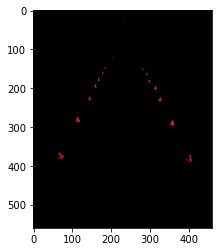

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt


image = cv2.imread('red.jpg') 
original = cv2.imread('red.jpg') 
original = cv2.resize(original, (460, 560))

upper_red = np.array([255,103,109][::-1], dtype = "uint8")
lower_red = np.array([170,5,20][::-1], dtype = "uint8")

mask = cv2.inRange(image, lower_red, upper_red)
detected_output = cv2.bitwise_and(image, image, mask =  mask) 
detected_output = cv2.resize(detected_output, (460, 560))
cv2.imshow("red color detection", detected_output) 
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(detected_output, cv2.COLOR_BGR2RGB))

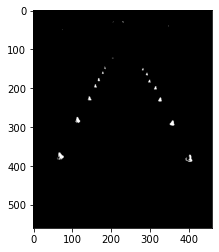

In [2]:
image = detected_output

img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
# visualize the binary image
cv2.imshow('Binary image', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))

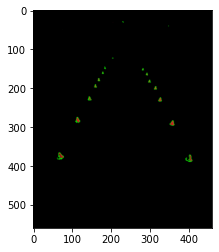

In [3]:
image_copy = image.copy()   

contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                            
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=0, lineType=cv2.LINE_AA)

# see the results
cv2.imshow('contours detected', image_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))

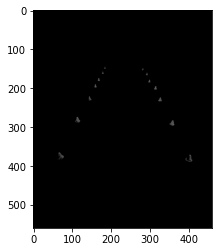

In [4]:
good = []
image_copy_remove = image.copy()
gray = cv2.cvtColor(image_copy_remove, cv2.COLOR_BGR2GRAY)
remove_mask = np.ones(image_copy_remove.shape[:2], dtype="uint8") * 255


for i in contours:
    area = cv2.contourArea(i)
    if(area > 4):
        good.append(i)
    else:
        cv2.drawContours(remove_mask, [i], -1, 0, -1)

good = np.array(good, dtype="object")

remove_image = cv2.bitwise_and(gray, gray, mask=remove_mask)

cv2.imshow('main contours', remove_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(remove_image, cv2.COLOR_BGR2RGB))

In [5]:
left = remove_image[:, 0:460//2].copy()
right = remove_image[:, 460//2:460].copy()

In [6]:
cv2.imshow("left half", left)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
cv2.imshow('right half', right)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
topleft = tuple(cv2.findNonZero(left)[0][0])
botleft = tuple(cv2.findNonZero(left)[-1][0])

In [9]:
topright = tuple([cv2.findNonZero(right)[0][0][0] + 230, cv2.findNonZero(right)[0][0][1]])
botright = tuple([cv2.findNonZero(right)[-1][0][0] + 230, cv2.findNonZero(right)[-1][0][1]])

In [10]:
#final = cv2.line(original, botleft, topleft, (0, 0, 255), 1)
#final = cv2.line(original, botright, topright, (0, 0, 255), 1)
#cv2.imshow('main', final)
#cv2.waitKey(0)
#ducv2.destroyAllWindows()

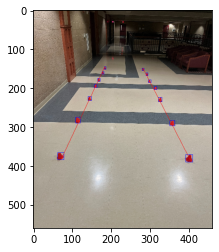

In [11]:
left_cones = []
right_cones = []

for i in good:
    (x,y,w,h) = cv2.boundingRect(i)
    temp = cv2.rectangle(original, (x,y), (x+w,y+h), (255, 0, 0), 0)
    
    
    x_avg = x + 0.5 * w
    y_avg = y + 0.5 * h
    
    
    if x < 230:        
        left_cones.append([x_avg, y_avg])
    else:
        right_cones.append([x_avg, y_avg])


final = cv2.line(original, botleft, topleft, (0, 0, 255), 1)
final = cv2.line(original, botright, topright, (0, 0, 255), 1)

cv2.imshow('main', final)
cv2.imwrite("answer.png", final)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))

In [ ]:
left_cones = np.array(left_cones)
x_left, y_left = np.hsplit(left_cones, 2)

right_cones = np.array(right_cones)
x_right, y_right = np.hsplit(right_cones, 2)